In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_24july.csv', header = 1, index_col = 'Date/Time')
df.head()

,avg,max,min,avg.1,min.1,avg.2,avg.3,min.2,avg.4,max.1,...,max.9,min.9,last.1,last.2,avg.23,max.10,min.10,time.1,Daily ET0 [mm],Unnamed: 54
Date/Time,,,,,,,,,,,,,,,,,,,,,
2023-07-24 20:00:00,22.57,22.68,22.49,22.5,22.4,0,0.00,0.00,99.97,100.00,...,25.5,25.5,0.0,6514,0,0,0,0,NaN,NaN
2023-07-24 19:00:00,22.98,23.48,22.58,22.5,22.3,0,0.07,0.00,97.55,100.00,...,25.6,25.5,0.0,6528,0,1,0,0,NaN,NaN
2023-07-24 18:00:00,23.38,23.66,23.27,22.9,22.6,45,0.07,0.03,97.36,98.83,...,25.5,25.5,1150.0,6559,0,1,0,0,NaN,NaN
2023-07-24 17:00:00,24.01,24.47,23.76,22.9,22.8,74,0.18,0.13,93.75,95.47,...,25.5,25.5,5075.0,6588,1,1,1,0,NaN,NaN
2023-07-24 16:00:00,24.34,24.93,23.93,23.2,23.0,133,0.19,0.07,93.63,97.48,...,25.6,25.5,6849.0,6636,1,1,0,35,NaN,NaN


## Renaming The Columns:

In [3]:
df.columns = [ 'air_temp_avg', 'air_temp_max', 'air_temp_min', 'dew_avg',
       'dew_min', 'solar_rad_avg', 'vpd_avg', 'vpd_min', 'rel_humi_avg',
       'rel_humi_max', 'rel_humi_min', 'precp_sum', 'leaf_wetness_time(min)',
       'wind_speed_avg', 'wind_speed_max', 'wind_gust_max', 'wind_dir_last',
       'eag_sm1_avg', 'eag_sm2_avg', 'eag_sm3_avg', 'eag_sm4_avg',
       'eag_sm5_avg', 'eag_sm6_avg', 'VIC1_avg', 'VIC2_avg', 'VIC3_avg',
       'VIC4_avg', 'VIC5_avg', 'VIC6_avg', 'soil_temp1_avg', 'soil_temp1_max',
       'soil_temp1_min', 'soil_temp2_avg', 'soil_temp2_max', 'soil_temp2_min',
       'soil_temp3_avg', 'soil_temp3_max', 'soil_temp3_min', 'soil_temp4_avg',
       'soil_temp4_max', 'soil_temp4_min', 'soil_temp5_avg', 'soil_temp5_max',
       'soil_temp5_min', 'soil_temp6_avg', 'soil_temp6_max', 'soil_temp6_min',
       'sp_last', 'bat_last', 'del_avg', 'del_max', 'del_min', 'sun_time',
       'Daily ET0 [mm]']

## Reversing and Handling Null Values:

In [4]:
df = df[::-1]
df['Daily ET0 [mm]'].fillna(0, inplace = True)

## Selecting only Average Humidity:

In [5]:
df1 = pd.DataFrame(df['rel_humi_avg'], index = df.index, columns = ['rel_humi_avg'])
df1.head()

,rel_humi_avg
Date/Time,
2023-04-25 13:00:00,15.60
2023-04-25 14:00:00,15.85
2023-04-25 15:00:00,15.60
2023-04-25 16:00:00,15.22
2023-04-25 17:00:00,15.71


## Plot of Average Humidity:

In [6]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df1.index, y = df1['rel_humi_avg'], mode = 'lines+markers'))

fig.update_layout(title = "Average Humidity")
fig.update_yaxes(title_text = "Average Humidity")
fig.update_xaxes(title_text = "Datetime")

fig.show()

## Components of Time Series:

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

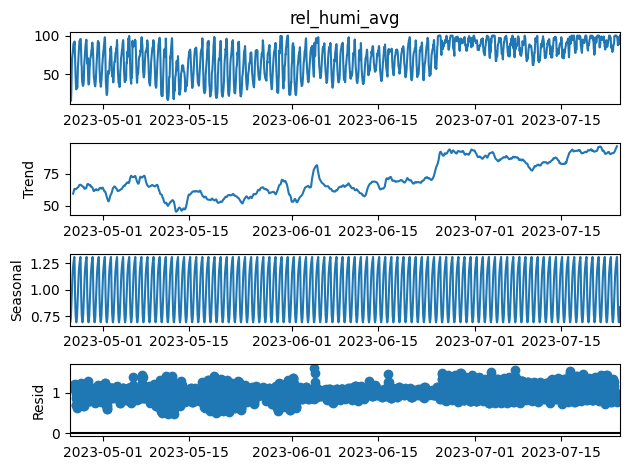

In [8]:
series = df['rel_humi_avg']

series.index = pd.date_range(start = df.index[0], periods = len(df1), freq='1H')

decomposition = seasonal_decompose(series, model = 'mutliplicative')
decomposition.plot()
plt.show()

## From above results, we can see the data consists of seasonality and there is no particular trend in the data but still irregular trend is present.

## Checking Stationarity:

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

## Dicky Fuller Test:

In [10]:
result = adfuller(df1['rel_humi_avg'].values, autolag = 'AIC')

In [11]:
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critial Value at {key} = {value}')

ADF Statistic: -1.328618228329157
p-value: 0.6159798863371325
Critial Value at 1% = -3.4334094211542983
Critial Value at 5% = -2.8628915360971003
Critial Value at 10% = -2.5674894918770197


### From above results, since p-value is greater than 0.05 we can conclude we can not reject the null hypothesis and hence the series is non-stationary.

## Checking with KPSS Test:

In [12]:
result = kpss(df1['rel_humi_avg'].values)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

KPSS Statistic: 5.949392520982201
p-value: 0.01


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




## Based on KPSS p-value, we reject Null Hypothesis and hence time series is not stationary.

## Making Time Series Stationary:

## Differencing:

In [13]:
df1['M1'] = df1['rel_humi_avg'] - df1['rel_humi_avg'].shift(1)

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df1.index, y = df1['M1'], mode = 'lines+markers'))

fig.update_layout(title = "Average Humidity (After first order differencing)")
fig.update_yaxes(title_text = "Average Humidity")
fig.update_xaxes(title_text = "Datetime")

fig.show()

## ADF Test:

In [15]:
result = adfuller(df1['M1'].dropna().values, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print(f'Critial Value at {key} = {value}')

ADF Statistic: -14.57458582219394
p-value: 4.570680720886783e-27
Critial Value at 1% = -3.4334094211542983
Critial Value at 5% = -2.8628915360971003
Critial Value at 10% = -2.5674894918770197


## KPSS:

In [16]:
result = kpss(df1['M1'].dropna().values)

print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

KPSS Statistic: 0.01247157735812499
p-value: 0.1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




## Since the p-value is less than 0.05 in ADF and greater than 0.5 in KPSS test hence we can state the time series is now stationary.

## Hence, the lags value should be atleast 1 to get stationary and accurate results since we get stationary time series after first order differencing.

## Identifying the values of order p and order q by using ACF and PACF:

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

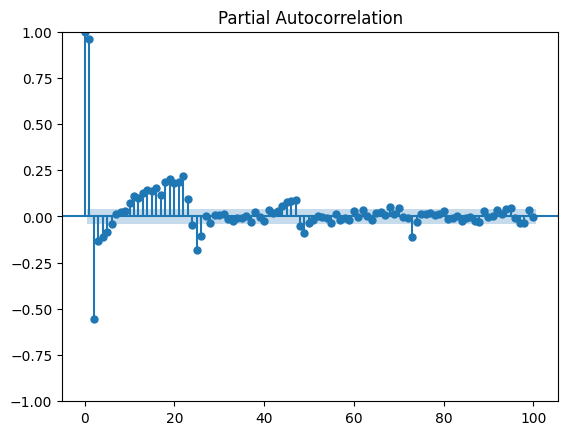

In [18]:
pacf = plot_pacf(df1['rel_humi_avg'], lags = 100)

## In case of Autoregression we only consider PACF and for only Moving Average we consider ACF.

## Train and Test Splits:

In [19]:
train = df1['M1'].iloc[:-72]
test = df1['M1'].iloc[-72:]

## AR model:

In [20]:
from statsmodels.tsa.ar_model import AutoReg

## When lags = 23 is considered, we get better results on test data and the forecasts are also good and are closest to the actual values when compared by checking on google.

In [21]:
model = AutoReg(train.dropna(), lags = 72).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                     M1   No. Observations:                 2093
Model:                    AutoReg(72)   Log Likelihood               -5584.118
Method:               Conditional MLE   S.D. of innovations              3.835
Date:                Wed, 26 Jul 2023   AIC                          11316.236
Time:                        05:00:01   BIC                          11731.476
Sample:                            72   HQIC                         11468.623
                                 2093                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0654      0.086      0.761      0.446      -0.103       0.234
M1.L1          0.0491      0.022      2.219      0.026       0.006       0.092
M1.L2         -0.1891      0.022     -8.538      0.000      -0.233      -0.146
M1.L3         -0.1587      0.023     -7.045      0.000      -0.203      -0.115
M1.L4         -0.1378      0.023     -6.066      0.000      -0.182      -0.093
M1.L5         -0.1099      0.023     -4.794      0.000      -0.155      -0.065
M1.L6         -0.1584      0.023     -6.873      0.000      -0.204      -0.113
M1.L7         -0.1502      0.023     -6.445      0.000      -0.196      -0.105
M1.L8         -0.1331      0.024     -5.642      0.000      -0.179      -0.087
M1.L9         -0.1645      0.024     -6.915      0.000      -0.211      -0.118
M1.L10        -0.1658      0.024     -6.889      0.000      -0.213      -0.119
M1.L11        -0.1392      0.024     -5.714      0.000      -0.187      -0.091
M1.L12        -0.1479      0.025     -6.026      0.000      -0.196      -0.100
M1.L13        -0.1411      0.025     -5.700      0.000      -0.190      -0.093
M1.L14        -0.1351      0.025     -5.417      0.000      -0.184      -0.086
M1.L15        -0.1698      0.025     -6.764      0.000      -0.219      -0.121
M1.L16        -0.1029      0.025     -4.053      0.000      -0.153      -0.053
M1.L17        -0.1116      0.025     -4.378      0.000      -0.162      -0.062
M1.L18        -0.1419      0.026     -5.539      0.000      -0.192      -0.092
M1.L19        -0.1103      0.026     -4.276      0.000      -0.161      -0.060
M1.L20        -0.0933      0.026     -3.601      0.000      -0.144      -0.043
M1.L21        -0.1193      0.026     -4.589      0.000      -0.170      -0.068
M1.L22        -0.0717      0.026     -2.744      0.006      -0.123      -0.020
M1.L23         0.0075      0.026      0.285      0.776      -0.044       0.059
M1.L24         0.1083      0.026      4.138      0.000       0.057       0.160
M1.L25         0.0475      0.026      1.811      0.070      -0.004       0.099
M1.L26        -0.0246      0.026     -0.936      0.349      -0.076       0.027
M1.L27         0.0089      0.026      0.341      0.733      -0.042       0.060
M1.L28        -0.0416      0.026     -1.586      0.113      -0.093       0.010
M1.L29        -0.0410      0.026     -1.565      0.118      -0.092       0.010
M1.L30        -0.0370      0.026     -1.411      0.158      -0.088       0.014
M1.L31        -0.0333      0.026     -1.269      0.205      -0.085       0.018
M1.L32        -0.0247      0.026     -0.942      0.346      -0.076       0.027
M1.L33        -0.0218      0.026     -0.830      0.406      -0.073       0.030
M1.L34        -0.0266      0.026     -1.017      0.309      -0.078       0.025
M1.L35        -0.0279      0.026     -1.063      0.288      -0.079       0.024
M1.L36         0.0064      0.026      0.246      0.806      -0.045       0.058
M1.L37        -0.0438      0.026     -1.671      0.095      -0.095       0.008
M1

In [22]:
start = len(train)
end = len(train) + len(test) - 1

In [23]:
pred = model.predict(start = start, end = end, dynamic = False)
pred_list = pred.values

last_value = df1.iloc[-73][0]

og_scale_pred = [last_value]
for diff in pred_list:
  og_scale_pred.append(og_scale_pred[-1]+diff)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [24]:
pred_df = pd.DataFrame(og_scale_pred, columns = ['Pred'], index = df.index[-73:])
pred_df['Actual'] = df1['rel_humi_avg'].iloc[-73:]

In [25]:
pred_df.dropna().head()

,Pred,Actual
Date/Time,,
2023-07-21 20:00:00,96.290000,96.29
2023-07-21 21:00:00,96.482626,94.80
2023-07-21 22:00:00,96.314880,97.44
2023-07-21 23:00:00,96.868272,94.46
2023-07-22 00:00:00,98.456216,95.47


## Plotting Predictions and Actuals:

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = pred_df.index, y = pred_df['Actual'], mode = 'lines+markers', name = 'Actual'))
fig.add_trace(go.Scatter(x = pred_df.index, y = pred_df['Pred'], mode = 'lines+markers', name = 'Predictions'))

fig.update_layout(title = "Average Humidity")
fig.update_yaxes(title_text = "Average Humidity")
fig.update_xaxes(title_text = "Datetime")

fig.show()

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
print("MSE = ", mean_squared_error(pred_df['Actual'].dropna(), pred_df['Pred'].dropna()))
print("MAE = ", mean_absolute_error(pred_df['Actual'].dropna(), pred_df['Pred'].dropna()))

MSE =  38.899899014273984
MAE =  4.725955500225338


## Forecasting:

In [29]:
def future_pred(mod, num_forecasts):

  # Specifying the start and end for forecasts
  strt = len(df1) + 1
  ed = len(df1) + num_forecasts

  # Predicting
  pred_future = mod.predict(start = strt, end = ed, dynamic = False)
  pred_values = pred_future.values

  #rescaling:
  last_val = df1.iloc[-1][0]
  forecast_list = [last_val]

  for f in pred_values:
    forecast_list.append(forecast_list[-1]+f)

  # Setting new index
  index_future_pred = pd.date_range(start = df1.index[-1], periods = num_forecasts, freq = '1H')

  # Creating dataframe for forecasts
  forecast_df = pd.DataFrame(forecast_list[1:], index = index_future_pred, columns = ['Forecasts'])

  return forecast_df

In [30]:
num_forecasts = 72  # 3 day forecasts
forecast_df = future_pred(model, num_forecasts)
forecast_df.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



,Forecasts
2023-07-24 20:00:00,100.130286
2023-07-24 21:00:00,100.794679
2023-07-24 22:00:00,102.134779
2023-07-24 23:00:00,103.340262
2023-07-25 00:00:00,103.988806


## Plotting Forecasts:

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = forecast_df.index, y = forecast_df['Forecasts'], mode = 'lines+markers', line=dict(color="#f4b916")))

fig.update_layout(title = "Average Humidity Forecasts")
fig.update_yaxes(title_text = "Average Humidity")
fig.update_xaxes(title_text = "Future Datetime")

fig.show()